# pandas 데이터 가져오기

Pandas는 파이썬에서 사용하는 데이터분석 라이브러리로, 행과 열로 이루어진 데이터 객체를 만들어 다룰 수 있게 되며 보다 안정적으로 대용량의 데이터들을 처리하는데 매우 편리한 도구 입니다.

먼저 pandas를 사용하기 위해서는 pandas를 설치한 이후에 아래와 같이 import를 해야 합니다.


In [1]:
import pandas as pd
import tensorflow as tf

In [2]:
csv_file = tf.keras.utils.get_file('heart.csv', 'https://storage.googleapis.com/applied-dl/heart.csv')

학습 데이터셋(heart.csv)는 화자 303명의(
나이,      성별,      가슴통증,  이완기 혈압,    콜레스테롤  수축기 혈압,    심전계 결과,   최고혈압,                                   염색된 혈관 수,             심장병유무) 정보를 담고있습니다.

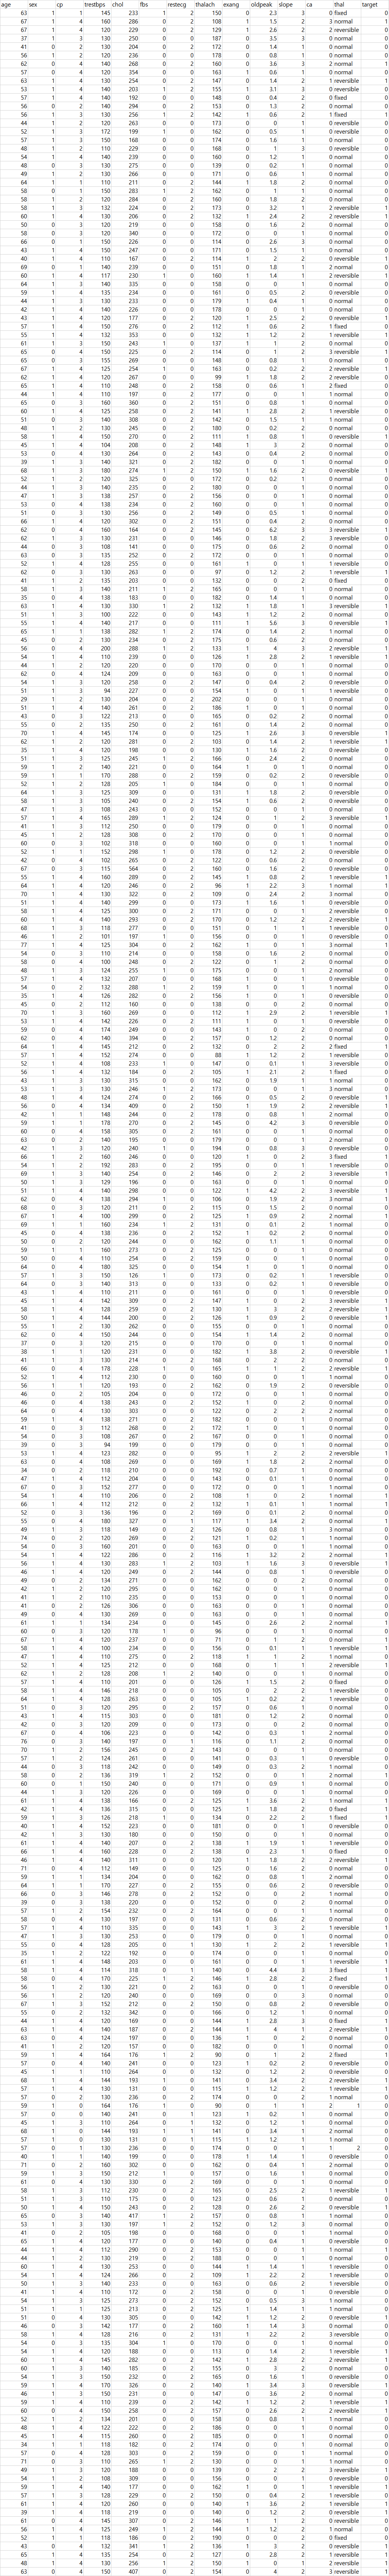

# pandas 사용하여 csv파일 읽기

csv파일은 간단하게 엑셀형식 파일

pandas는 정형 데이터를 읽고 조작하는데 유용한 유틸리티 함수를 많이 제공하는 파이썬 라이브러리입니다.
pandas가 제공하는 read_csv는 이름 그대로 csv 파일 읽어다가 pandas의 기본 데이터구조인 dataframe으로 만들어줍니다.

pandas를 이용해 csv_file 데이터를 다운로드하여 읽은 다음 데이터프레임으로 변환하겠습니다.


In [36]:
df = pd.read_csv(csv_file)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


In [37]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal         object
target        int64
dtype: object

oldpeak은 float64타입 2.3, 1.5 같은 소수값을 가집니다.
thal 은 strings를 포함하는 object 타입입니다.

thal column(categorical data, 범주형변수)를 이산 숫자들로 바꾸고 싶습니다
일반적인 숫자형 데이터와 다르게 이를 기계가 바로 인식할수 없기 때문입니다

In [38]:
df['thal'] = pd.Categorical(df['thal'])
df['thal'] = df.thal.cat.codes

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,2,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,4,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


# tf.data.dataset 사용해서 데이터 가져오기

pandas dataframe을 tf.data.dataset으로 가져오겠습니다.

이 데이터프레임 에는 feature column 여러개와 target column이 하나 있습니다

target column만 떼서 두개로 잘랐습니다

In [39]:
target = df.pop('target')
target


0      0
1      1
2      0
3      0
4      0
      ..
298    0
299    1
300    1
301    1
302    1
Name: target, Length: 303, dtype: int64

tf.data.dataset.from_tensor_slices를 활용해서 잘라낸 조각들을 분류해서 합칩니다.

feature column과 target column이 잘 나누어진 것을 확인할 수 있습니다.

그런데, 다시 합쳐진 pandas 데이터 프레임은 사실 하나가 아니라 하나씩 쉽게잘라서 쓸수있는 상태입니다

In [40]:
dataset = tf.data.Dataset.from_tensor_slices((df.values, target.values))

for feat, targ in dataset.take(5):
  print ('Features: {}, Target: {}'.format(feat, targ))

Features: [ 63.    1.    1.  145.  233.    1.    2.  150.    0.    2.3   3.    0.
   2. ], Target: 0
Features: [ 67.    1.    4.  160.  286.    0.    2.  108.    1.    1.5   2.    3.
   3. ], Target: 1
Features: [ 67.    1.    4.  120.  229.    0.    2.  129.    1.    2.6   2.    2.
   4. ], Target: 0
Features: [ 37.    1.    3.  130.  250.    0.    0.  187.    0.    3.5   3.    0.
   3. ], Target: 0
Features: [ 41.    0.    2.  130.  204.    0.    2.  172.    0.    1.4   1.    0.
   3. ], Target: 0


In [22]:
tf.constant(df['thal'])

<tf.Tensor: id=14741, shape=(303,), dtype=int32, numpy=
array([2, 3, 4, 3, 3, 3, 3, 3, 4, 4, 2, 3, 2, 4, 4, 3, 4, 3, 3, 3, 3, 3,
       3, 4, 4, 3, 3, 3, 3, 4, 3, 4, 3, 4, 3, 3, 4, 2, 4, 3, 4, 3, 4, 4,
       2, 3, 3, 4, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 4,
       4, 2, 3, 3, 4, 3, 4, 3, 3, 4, 4, 3, 3, 4, 4, 3, 3, 3, 3, 4, 4, 4,
       3, 3, 4, 3, 4, 4, 3, 4, 3, 3, 3, 4, 3, 4, 4, 3, 3, 4, 4, 4, 4, 4,
       3, 3, 3, 3, 4, 3, 4, 3, 4, 4, 3, 3, 2, 4, 4, 2, 3, 3, 4, 4, 3, 4,
       3, 3, 4, 2, 4, 4, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4,
       4, 3, 3, 3, 4, 3, 4, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 2,
       4, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 2, 2, 4, 3, 4, 2, 4, 3,
       3, 4, 3, 3, 3, 3, 4, 3, 4, 3, 4, 2, 2, 4, 3, 4, 3, 2, 4, 3, 3, 2,
       4, 4, 4, 4, 3, 0, 3, 3, 3, 3, 1, 4, 3, 3, 3, 4, 3, 4, 3, 3, 3, 4,
       3, 3, 4, 4, 4, 4, 3, 3, 4, 3, 4, 3, 4, 4, 3, 4, 4, 3, 4, 4, 3

dataset을 섞고 묶습니다

In [8]:
train_dataset = dataset.shuffle(len(df)).batch(1)

모델 만들고 학습시킵니다

In [10]:
def get_compiled_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

  model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model

model = get_compiled_model()
model.fit(train_dataset, epochs=15)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/15
303/303 [==============================] - 3s 9ms/step - loss: 1.7278 - accuracy: 0.6337
Epoch 2/15
303/303 [==============================] - 1s 2ms/step - loss: 1.1129 - accuracy: 0.6568
Epoch 3/15
303/303 [==============================] - 1s 2ms/step - loss: 0.7995 - accuracy: 0.6931
Epoch 4/15
303/303 [==============================] - 1s 2ms/step - loss: 0.6286 - accuracy: 0.7459
Epoch 5/15
303

# 특성 열의 대안
사전을 모델에 대한 입력으로 전달하는 것은 tf.keras.layers.Input 레이어의 일치하는 사전을 tf.keras.layers.Input 사전 처리를 적용하고 기능적 api를 사용하여 쌓아 tf.keras.layers.Input 큼 쉽습니다. 이 기능 을 특성 열의 대안으로 사용할 수 있습니다.

학습 모델을 이미 생성해 놓은 곳에 

새로운 데이터가 input으로 들어올때 마다 자동으로 전처리가 수행된 모델을 가져오는 것으로 보입니다.

데이터를 가져올때 이미 전처리가 된 데이터를 사용한 모델로 보여집니다.

위에 처럼 학습모델을 만들 수도 있고, 특성 열의 대안과 같이 모델을 만들수도 있다고 보여주는 거 같습니다.

In [41]:
inputs = {key: tf.keras.layers.Input(shape=(), name=key) for key in df.keys()}
x = tf.stack(list(inputs.values()), axis=-1)

x = tf.keras.layers.Dense(10, activation='relu')(x)
output = tf.keras.layers.Dense(1)(x)

model_func = tf.keras.Model(inputs=inputs, outputs=output)

model_func.compile(optimizer='adam',
                   loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                   metrics=['accuracy'])